In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sizes = ['test_large/', 'test_medium/']
tests = ['01/', '02/', '03/', '04/', '05/', '06/', '07/', '08/', '09/', '10/']
path = '/home/lucia/Documenti/GitHub/cloud-computing-project/jmeter/'

In [3]:
avg_cpu_df = pd.DataFrame(index=np.arange(16), columns=['average_cpu'])
avg_cpu_df['average_cpu'] = 0
avg_inst_df = pd.DataFrame(index=np.arange(24), columns=['average_instance_number'])
avg_inst_df['average_instance_number'] = 0

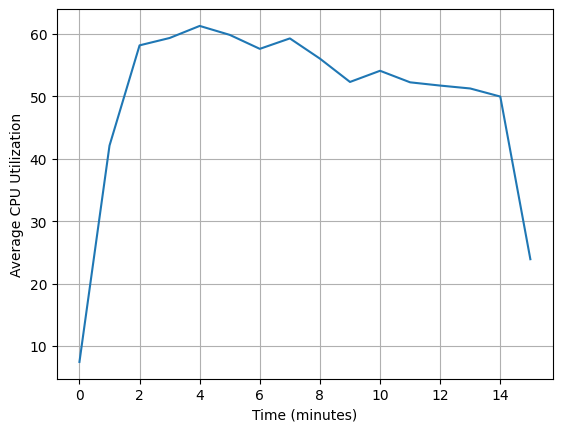

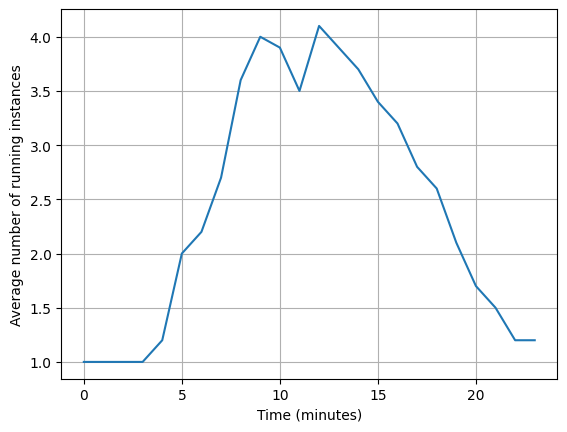

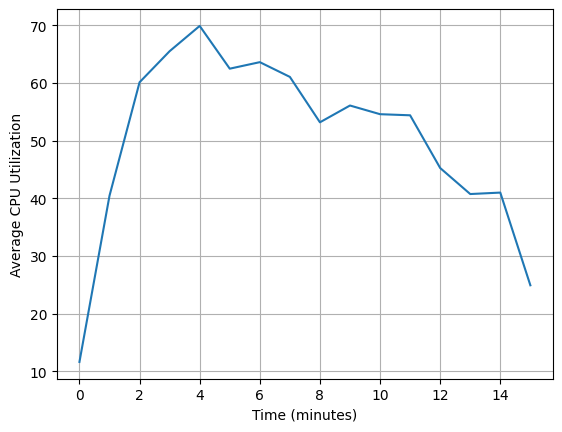

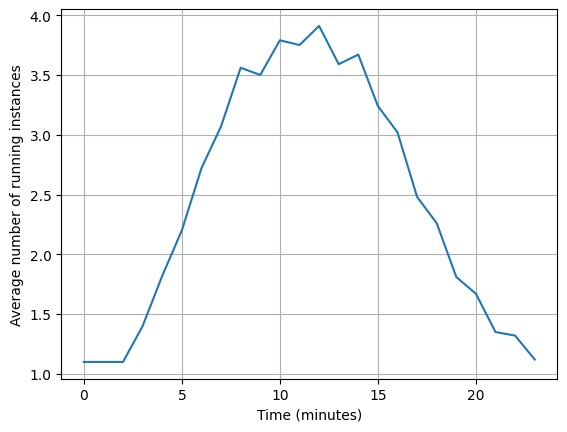

In [4]:
for size in sizes:
    path_size = path
    path_size += size
    for test in tests:
        path_test = path_size
        path_test += test
        cpu_df = pd.read_csv(path_test + "data_cpu.csv")
        avg_cpu_df = pd.concat([avg_cpu_df, cpu_df], axis=1)
        avg_cpu_df['average_cpu'] = avg_cpu_df['average_cpu'] + avg_cpu_df['Average']
        avg_cpu_df = avg_cpu_df[['average_cpu']]
        inst_df = pd.read_csv(path_test + 'data_number_instances.csv')
        avg_inst_df = pd.concat([avg_inst_df, inst_df], axis=1)
        avg_inst_df['average_instance_number'] = avg_inst_df['average_instance_number'] + avg_inst_df['Average']
        avg_inst_df = avg_inst_df[['average_instance_number']]
    avg_cpu_df['average_cpu'] = avg_cpu_df['average_cpu'] / 10
    fig, ax = plt.subplots()
    ax.plot(avg_cpu_df.index, avg_cpu_df['average_cpu'])
    ax.set_xlabel('Time (minutes)')
    ax.set_ylabel('Average CPU Utilization')
    ax.grid(True)
    plt.savefig(path_size + 'avg_cpu.svg')
    avg_inst_df['average_instance_number'] = avg_inst_df['average_instance_number'] / 10
    fig, ax = plt.subplots()
    ax.plot(avg_inst_df.index, avg_inst_df['average_instance_number'])
    ax.set_xlabel('Time (minutes)')
    ax.set_ylabel('Average number of running instances')
    ax.grid(True)
    plt.savefig(path_size + 'avg_instance_number.svg')

In [32]:
min_len = None
total_average = {}
for size in sizes:
    path_size = path
    path_size += size
    total_average[size] = {}
    for test in tests:
        path_test = path_size
        path_test += test
        log_df = pd.read_csv(path_test + "log_" + test[:-1] + ".csv")
        log_df = log_df[log_df['label'] == 'Test'].reset_index(drop=True)
        t = log_df['timeStamp'].iloc[0]
        c = 0
        average = []
        tot_elaps = 0
        for _, row in log_df.iterrows():
            if row['timeStamp'] >= t+30000:
                average.append(tot_elaps/c)
                c = 0
                tot_elaps = 0
                t = row['timeStamp']
            c += 1
            tot_elaps += row['elapsed']
        if min_len == None:
            min_len = len(average)
        else:
            min_len = min(min_len, len(average))
        total_average[size][test] = average

In [34]:
for size in sizes:
    for test in tests:
        l = total_average[size][test]
        if len(l) > min_len:
            l = l[:min_len]
            total_average[size][test] = l

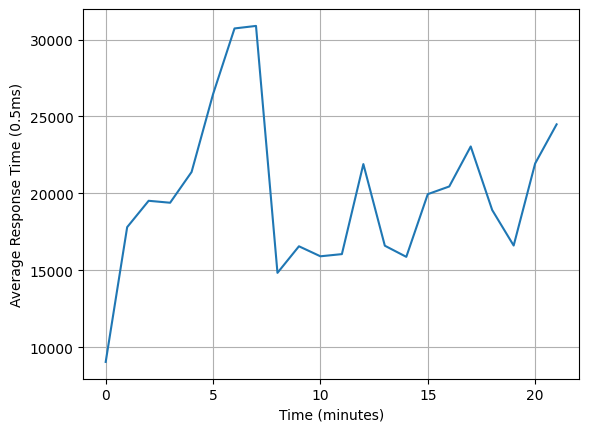

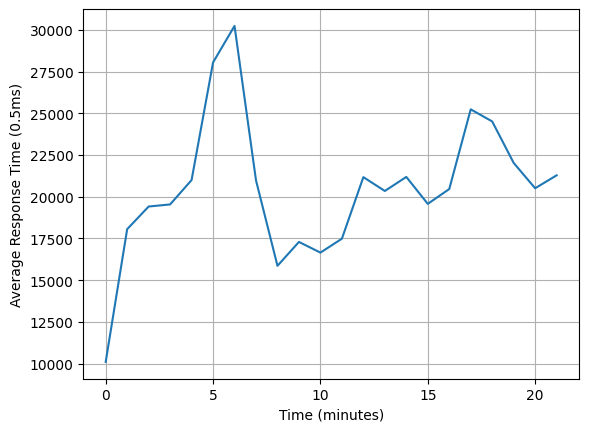

In [39]:
for size in sizes:
    path_size = path
    path_size += size
    tot = [0 for _ in range(min_len)]
    for test in tests:
        for i, val in enumerate(total_average[size][test]):
            tot[i] += val
    average = [val/len(tests) for val in tot]
    average_response_time_df = pd.DataFrame(average, columns=['avg_response_time'])
    fig, ax = plt.subplots()
    ax.plot(average_response_time_df.index, average_response_time_df['avg_response_time'])
    ax.set_xlabel('Time (minutes)')
    ax.set_ylabel('Average Response Time (0.5ms)')
    ax.grid(True)
    plt.savefig(path_size + 'avg_response_time.svg')